After conducting tests on a subset comprising 20% of our datasets, namely KDDTrain+ and KDDTest+, we observed disparities in the results. The provided code was initially developed using 80% of the data to gain a more comprehensive understanding of its behavior, particularly concerning outliers, features, and information analysis. This approach allows for a thorough examination of the code's performance across a larger portion of the dataset, aiding in a more nuanced evaluation of its behavior.

#**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image, display
import pydotplus as pdotp
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import plotly.graph_objects as go
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#**Data Understanding**

In [ ]:
df  = pd.read_csv("KDDTrain+.csv")
df1 = pd.read_csv("KDDTest+.csv")
df

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0              0           tcp  ftp_data   SF        491          0     0   
1              0           udp     other   SF        146          0     0   
2              0           tcp   private   S0          0          0     0   
3              0           tcp      http   SF        232       8153     0   
4              0           tcp      http   SF        199        420     0   
...          ...           ...       ...  ...        ...        ...   ...   
125968         0           tcp   private   S0          0          0     0   
125969         8           udp   private   SF        105        145     0   
125970         0           tcp      smtp   SF       2231        384     0   
125971         0           tcp    klogin   S0          0          0     0   
125972         0           tcp  ftp_data   SF        151          0     0   

        wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0                    0       0    0  ...                    0.17   
1                    0       0    0  ...                    0.00   
2                    0       0    0  ...                    0.10   
3                    0       0    0  ...                    1.00   
4                    0       0    0  ...                    1.00   
...                ...     ...  ...  ...                     ...   
125968               0       0    0  ...                    0.10   
125969               0       0    0  ...                    0.96   
125970               0       0    0  ...                    0.12   
125971               0       0    0  ...                    0.03   
125972               0       0    0  ...                    0.30   

        dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                         0.03                         0.17   
1                         0.60                         0.88   
2                         0.05                         0.00   
3                         0.00                         0.03   
4                         0.00                         0.00   
...                        ...                          ...   
125968                    0.06                         0.00   
125969                    0.01                         0.01   
125970                    0.06                         0.00   
125971                    0.05                         0.00   
125972                    0.03                         0.30   

        dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                              0.00                  0.00   
1                              0.00                  0.00   
2                              0.00                  1.00   
3                              0.04                  0.03   
4                              0.00                  0.00   
...                             ...                   ...   
125968                         0.00                  1.00   
125969                         0.00                  0.00   
125970                         0.00                  0.72   
125971                         0.00                  1.00   
125972                         0.00                  0.00   

        dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                           0.00                  0.05   
1                           0.00                  0.00   
2                           1.00                  0.00   
3                           0.01                  0.00   
4                           0.00                  0.00   
...                          ...                   ...   
125968                      1.00                  0.00   
125969                      0.00                  0.00   
125970                      0.00                  0.01   
125971                      1.00                  0.00   
125972                      0.00                  0.00   

        dst_host_srv_rerror_rate  xAttack  ekher haja  
0                      

In [ ]:
"""split_index = int(0.80 * len(df))

# Print the total number of rows in the original dataset and the calculated split index
print("Total Rows:", len(df))
print("Split Index:", split_index)

# Select the first 80% of the dataset
part_df = df.iloc[:split_index]

# Print the number of rows in the extracted dataset
print("Rows in Extracted Dataset:", len(part_df))"""

'split_index = int(0.80 * len(df))\n\n# Print the total number of rows in the original dataset and the calculated split index\nprint("Total Rows:", len(df))\nprint("Split Index:", split_index)\n\n# Select the first 80% of the dataset\npart_df = df.iloc[:split_index]\n\n# Print the number of rows in the extracted dataset\nprint("Rows in Extracted Dataset:", len(part_df))'

In [ ]:
"""split_index1 = int(0.80 * len(df1))

# Print the total number of rows in the original dataset and the calculated split index
print("Total Rows:", len(df1))
print("Split Index:", split_index1)

# Select the first 80% of the dataset
part_df1 = df.iloc[:split_index1]

# Print the number of rows in the extracted dataset
print("Rows in Extracted Dataset:", len(part_df1))"""

'split_index1 = int(0.80 * len(df1))\n\n# Print the total number of rows in the original dataset and the calculated split index\nprint("Total Rows:", len(df1))\nprint("Split Index:", split_index1)\n\n# Select the first 80% of the dataset\npart_df1 = df.iloc[:split_index1]\n\n# Print the number of rows in the extracted dataset\nprint("Rows in Extracted Dataset:", len(part_df1))'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

**Visualization**

In [ ]:
"""# we use crosstab to get attack vs protocol
attack_vs_protocol = pd.crosstab(part_df.xAttack, part_df.protocol_type)
attack_vs_protocol"""

'# we use crosstab to get attack vs protocol\nattack_vs_protocol = pd.crosstab(part_df.xAttack, part_df.protocol_type)\nattack_vs_protocol'

In [ ]:
""""import itertools
# helper function for drawing mulitple charts.
def bake_pies(data_list,labels):
    list_length = len(data_list)

    # setup for mapping colors
    color_list = sns.color_palette()
    color_cycle = itertools.cycle(color_list)
    cdict = {}

    # build the subplots
    fig, axs = plt.subplots(1, list_length,figsize=(18,10), tight_layout=False)
    plt.subplots_adjust(wspace=1/list_length)
     # loop through the data sets and build the charts
    for count, data_set in enumerate(data_list):

        # update our color mapt with new values
        for num, value in enumerate(np.unique(data_set.index)):
            if value not in cdict:
                cdict[value] = next(color_cycle)

        # build the wedges
        wedges,texts = axs[count].pie(data_set,
                           colors=[cdict[v] for v in data_set.index])

        # build the legend
        axs[count].legend(wedges, data_set.index,title="Flags",
                           loc="center left",
                           bbox_to_anchor=(1, 0, 0.5, 1))
        # set the title
        axs[count].set_title(labels[count])

    return axs
    # get the series for each protocol
icmp_attacks = attack_vs_protocol.icmp
tcp_attacks = attack_vs_protocol.tcp
udp_attacks = attack_vs_protocol.udp
# create the charts
bake_pies([icmp_attacks, tcp_attacks, udp_attacks],['icmp','tcp','udp'])
plt.show()"""

'"import itertools\n# helper function for drawing mulitple charts.\ndef bake_pies(data_list,labels):\n    list_length = len(data_list)\n\n    # setup for mapping colors\n    color_list = sns.color_palette()\n    color_cycle = itertools.cycle(color_list)\n    cdict = {}\n\n    # build the subplots\n    fig, axs = plt.subplots(1, list_length,figsize=(18,10), tight_layout=False)\n    plt.subplots_adjust(wspace=1/list_length)\n     # loop through the data sets and build the charts\n    for count, data_set in enumerate(data_list):\n\n        # update our color mapt with new values\n        for num, value in enumerate(np.unique(data_set.index)):\n            if value not in cdict:\n                cdict[value] = next(color_cycle)\n\n        # build the wedges\n        wedges,texts = axs[count].pie(data_set,\n                           colors=[cdict[v] for v in data_set.index])\n\n        # build the legend\n        axs[count].legend(wedges, data_set.index,title="Flags",\n                    

<Axes: >

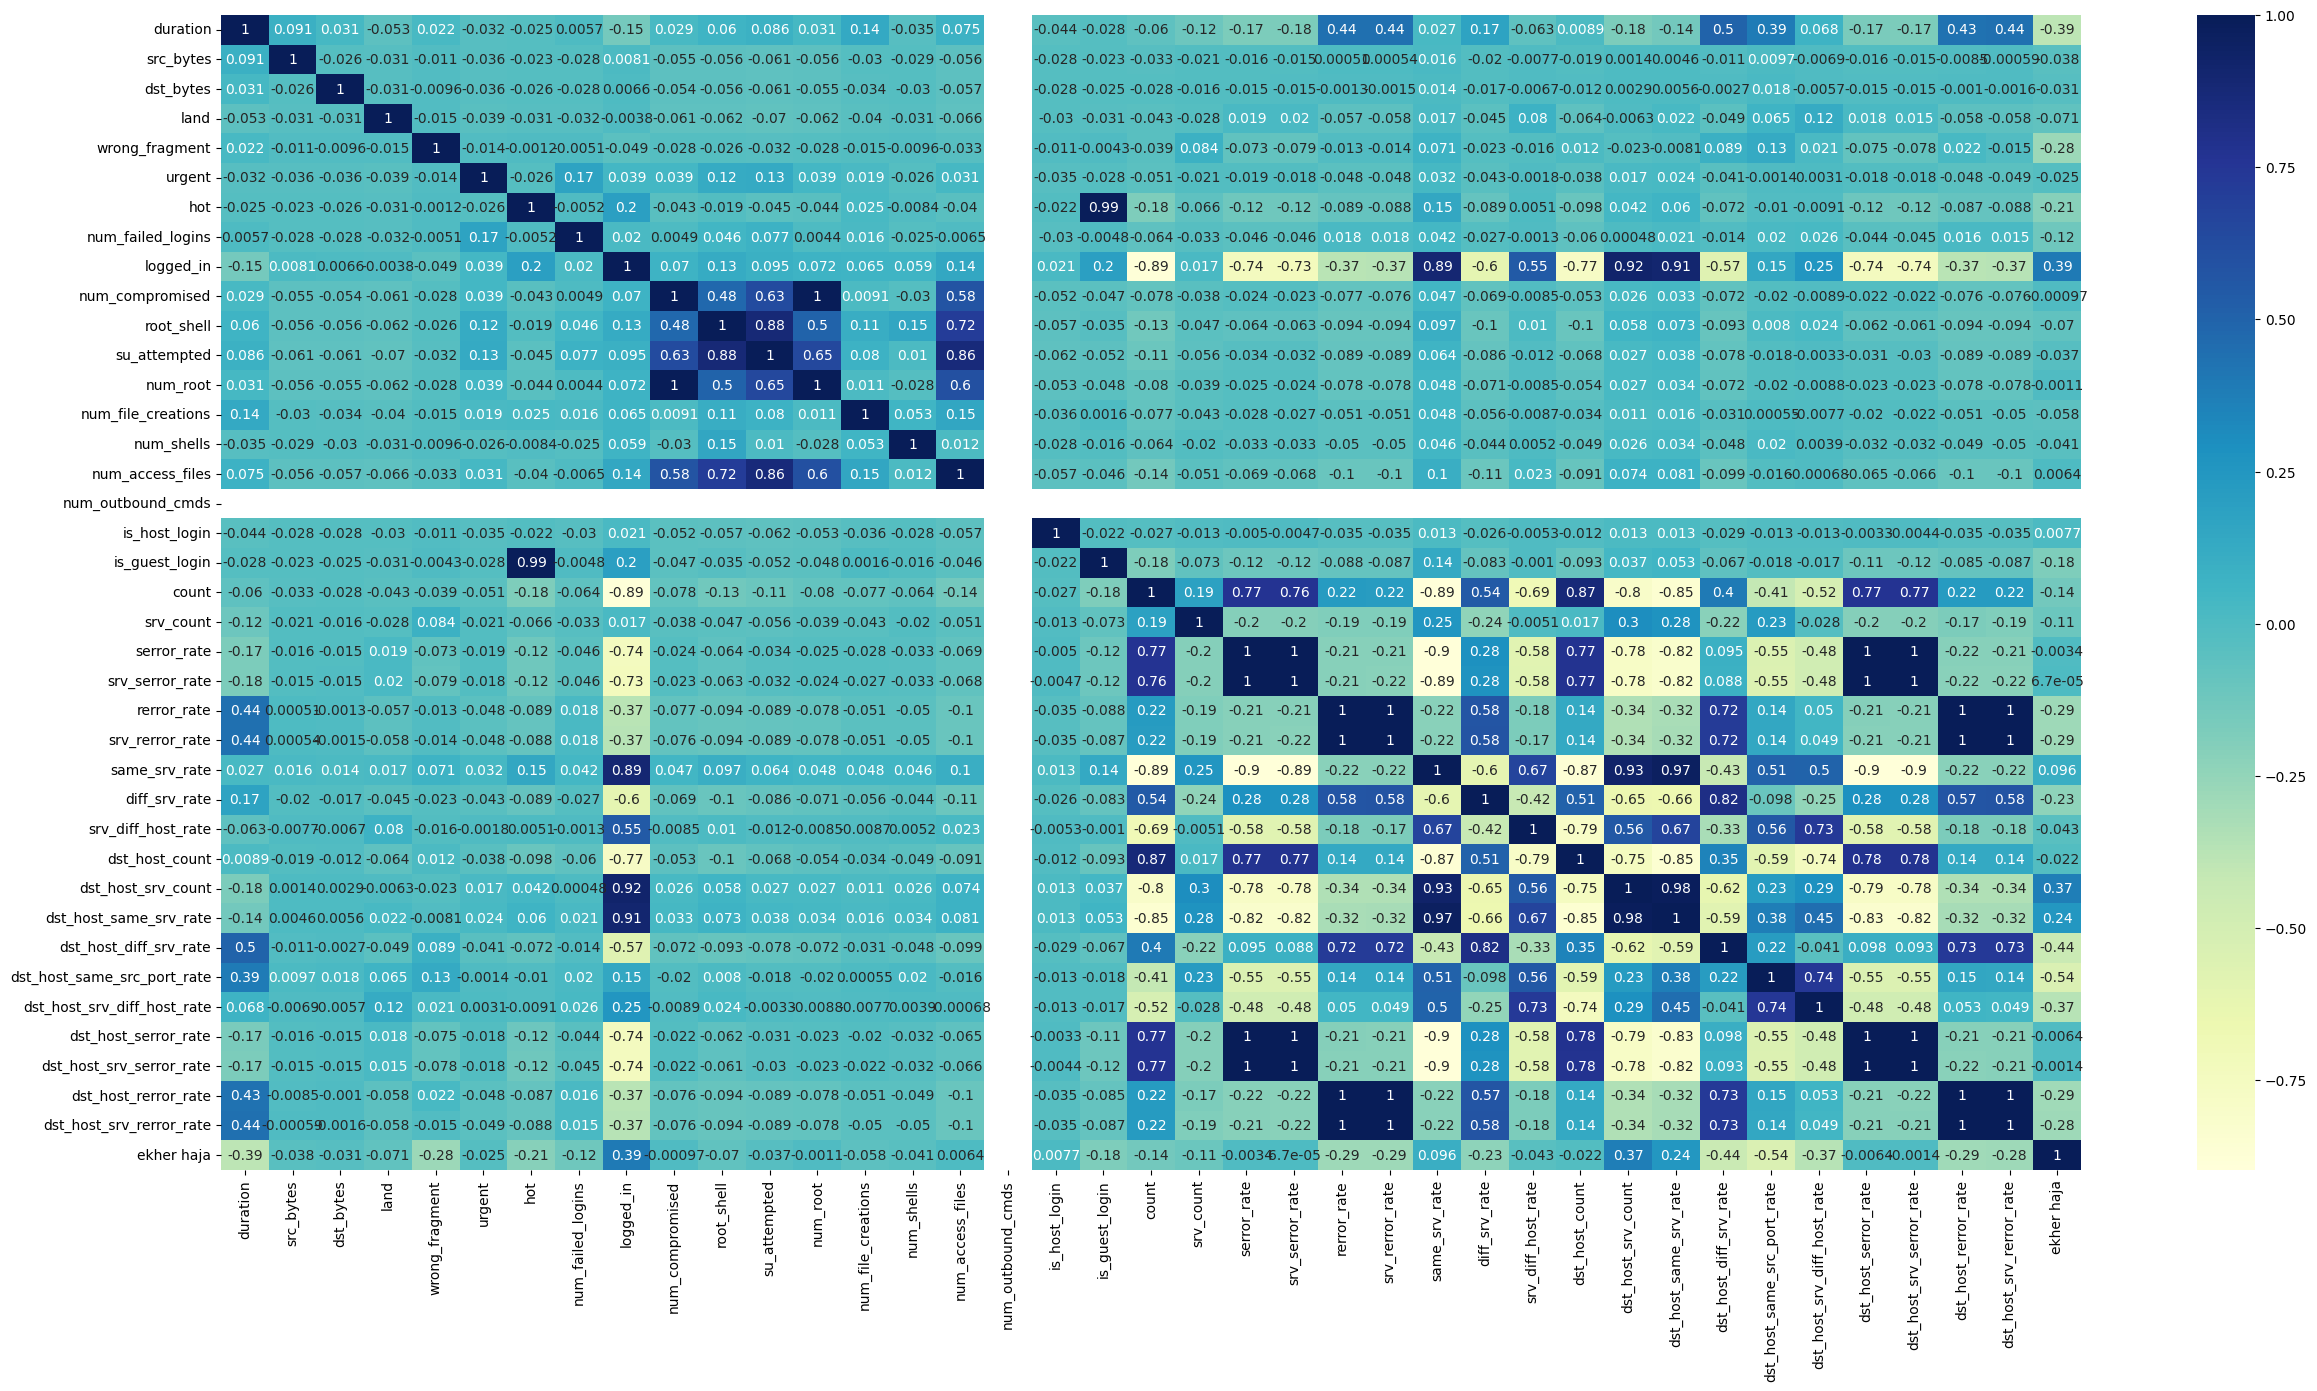

In [ ]:
numeric_columns = df.select_dtypes(include=['number']).columns
corr_matrix = df[numeric_columns].corr()
plt.figure(figsize=(30,15))
sns.heatmap(corr_matrix.corr(), annot=True, cmap="YlGnBu")

**Checking for missing data**

In [ ]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
df1.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

**Checking for Duplicated rows**

In [ ]:
print(f"Number of duplicate rows in the train data: {df.duplicated().sum()}")

Number of duplicate rows in the train data: 0


In [ ]:
print(f"Number of duplicate rows in the test data: {df1.duplicated().sum()}")

Number of duplicate rows in the test data: 0


**Checking for Outliers**

In [ ]:
""""num_df = part_df.select_dtypes(include=['float64', 'int64']).columns
outlier_counts = {}
for col in num_df:
    q1 = part_df[col].quantile(0.25)
    q3 = part_df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = part_df[col][(part_df[col] < lower_bound) | (part_df[col] > upper_bound)]
    outlier_counts[col] = len(outliers)
a=outlier_counts

columns = list(a.keys())
outlier_counts_values = list(a.values())
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(columns, outlier_counts_values, color='skyblue')
plt.title('Number of Outliers in Numerical Columns')
plt.xlabel('Numerical Columns')
plt.ylabel('Number of Outliers')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()"""

'"num_df = part_df.select_dtypes(include=[\'float64\', \'int64\']).columns\noutlier_counts = {}\nfor col in num_df:\n    q1 = part_df[col].quantile(0.25)\n    q3 = part_df[col].quantile(0.75)\n    iqr = q3 - q1\n    lower_bound = q1 - 1.5 * iqr\n    upper_bound = q3 + 1.5 * iqr\n    outliers = part_df[col][(part_df[col] < lower_bound) | (part_df[col] > upper_bound)]\n    outlier_counts[col] = len(outliers)\na=outlier_counts\n\ncolumns = list(a.keys())\noutlier_counts_values = list(a.values())\n# Plotting\nplt.figure(figsize=(10, 6))\nplt.bar(columns, outlier_counts_values, color=\'skyblue\')\nplt.title(\'Number of Outliers in Numerical Columns\')\nplt.xlabel(\'Numerical Columns\')\nplt.ylabel(\'Number of Outliers\')\nplt.xticks(rotation=45, ha=\'right\')  # Rotate x-axis labels for better readability\nplt.tight_layout()\nplt.show()'

In [ ]:
attack_train=df['xAttack']
df=df.drop(['ekher haja','xAttack'], axis=1)

In [ ]:
attack_test=df1['xAttack']
df1=df1.drop(['ekher haja','xAttack'], axis=1)

#**Train-Data Transformation**

**Log Transformation For Numerical Data**

In [ ]:
num_df = df.select_dtypes(include=['float64', 'int64']).copy()
num_df_l= np.log1p(num_df)

**Checking For outliers after performing the Log Function on Numerical Data**

In [ ]:
"""outlier_counts = {}
for col in num_df_l:
    q1 = num_df_l[col].quantile(0.25)
    q3 = num_df_l[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = num_df_l[col][(num_df_l[col] < lower_bound) | (num_df_l[col] > upper_bound)]
    outlier_counts[col] = len(outliers)
a=outlier_counts

columns = list(a.keys())
outlier_counts_values = list(a.values())
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(columns, outlier_counts_values, color='skyblue')
plt.title('Number of Outliers in Numerical Columns after performing Log Function')
plt.xlabel('Numerical Columns')
plt.ylabel('Number of Outliers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()"""

"outlier_counts = {}\nfor col in num_df_l:\n    q1 = num_df_l[col].quantile(0.25)\n    q3 = num_df_l[col].quantile(0.75)\n    iqr = q3 - q1\n    lower_bound = q1 - 1.5 * iqr\n    upper_bound = q3 + 1.5 * iqr\n    outliers = num_df_l[col][(num_df_l[col] < lower_bound) | (num_df_l[col] > upper_bound)]\n    outlier_counts[col] = len(outliers)\na=outlier_counts\n\ncolumns = list(a.keys())\noutlier_counts_values = list(a.values())\n# Plotting\nplt.figure(figsize=(10, 6))\nplt.bar(columns, outlier_counts_values, color='skyblue')\nplt.title('Number of Outliers in Numerical Columns after performing Log Function')\nplt.xlabel('Numerical Columns')\nplt.ylabel('Number of Outliers')\nplt.xticks(rotation=45, ha='right')\nplt.tight_layout()\nplt.show()"

**Scaling Numerical Data**

In [ ]:
scaler= StandardScaler()
num_dff=scaler.fit_transform(num_df_l)
num_df = pd.DataFrame(num_dff, columns=["duration","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate"])

**Encoding Categorical Data with Label Encoder**

In [ ]:
cat_df = df.select_dtypes(include=['object']).copy()

# Categorical boolean mask
categorical_feature_mask = cat_df.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = cat_df.columns[categorical_feature_mask].tolist()

le = LabelEncoder()
cat_df[categorical_cols] = cat_df[categorical_cols].apply(lambda col: le.fit_transform(col))

In [ ]:
result_df = pd.concat([cat_df,num_df,attack_train], axis=1)
result_df

protocol_type  service  flag  duration  src_bytes  dst_bytes  \
0                   1       20     9 -0.221617   0.995517  -0.869111   
1                   2       44     9 -0.221617   0.590429  -0.869111   
2                   1       49     5 -0.221617  -1.082990  -0.869111   
3                   1       24     9 -0.221617   0.744881   1.668642   
4                   1       24     9 -0.221617   0.693670   0.833560   
...               ...      ...   ...       ...        ...        ...   
125968              1       49     5 -0.221617  -1.082990  -0.869111   
125969              2       49     9  1.292276   0.480779   0.535152   
125970              1       54     9 -0.221617   1.502588   0.808373   
125971              1       30     5 -0.221617  -1.082990  -0.869111   
125972              1       20     9 -0.221617   0.601645  -0.869111   

            land  wrong_fragment    urgent       hot  ...  dst_host_srv_count  \
0      -0.014089       -0.091298 -0.008145 -0.127866  ...           -0.322273   
1      -0.014089       -0.091298 -0.008145 -0.127866  ...           -1.835183   
2      -0.014089       -0.091298 -0.008145 -0.127866  ...           -0.300012   
3      -0.014089       -0.091298 -0.008145 -0.127866  ...            1.026739   
4      -0.014089       -0.091298 -0.008145 -0.127866  ...            1.026739   
...          ...             ...       ...       ...  ...                 ...   
125968 -0.014089       -0.091298 -0.008145 -0.127866  ...           -0.322273   
125969 -0.014089       -0.091298 -0.008145 -0.127866  ...            1.000834   
125970 -0.014089       -0.091298 -0.008145 -0.127866  ...           -0.218525   
125971 -0.014089       -0.091298 -0.008145 -0.127866  ...           -0.948017   
125972 -0.014089       -0.091298 -0.008145 -0.127866  ...            0.325733   

        dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    -0.707207               -0.283351   
1                    -1.219836                2.913279   
2                    -0.908641               -0.143775   
3                     1.043341               -0.497881   
4                     1.043341               -0.497881   
...                        ...                     ...   
125968               -0.908641               -0.074981   
125969                0.977378               -0.425664   
125970               -0.849810               -0.074981   
125971               -1.123324               -0.143775   
125972               -0.363197               -0.283351   

        dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                          0.211010                    -0.317742   
1                          2.379863                    -0.317742   
2                         -0.506977                    -0.317742   
3                         -0.371803                     0.133090   
4                         -0.506977                    -0.317742   
...                             ...                          ...   
125968                    -0.506977                    -0.317742   
125969                    -0.461474                    -0.317742   
125970                    -0.506977                    -0.317742   
125971                    -0.506977                    -0.317742   
125972                     0.692829                    -0.317742   

        dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  -0.644079                 -0.626588             -0.167741   
1                  -0.644079                 -0.626588             -0.394076   
2                   1.603287                  1.616524             -0.394076   
3                  -0.548241                 -0.594387             -0.394076   
4                  -0.644079                 -0.626588             -0.394076   
...                      ...                       ...                   ...   
125968              1.603287                  1.616524             -0.394076   
125969          

In [ ]:
"""result_df.iloc[:,0:41].hist(bins=100, figsize=(35,40), ec='w')
plt.show()"""

"result_df.iloc[:,0:41].hist(bins=100, figsize=(35,40), ec='w')\nplt.show()"

**Encoding The Label "xAttack"**

In [ ]:
att_train=result_df['xAttack']
# change the xAttack column
attacks_train = att_train.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
# put the new xAttack column back
result_df['xAttack']=attacks_train

In [ ]:
result_df['xAttack'].unique()

array([0, 1, 3, 2, 4])

In [ ]:
X_train = result_df.drop('xAttack', axis=1)
y_train = result_df['xAttack']

#**Test-Data Transformation**

**Log Transformation For Numerical Data**

In [ ]:
num_df1 = df1.select_dtypes(include=['float64', 'int64']).copy()
num_df_ll= np.log1p(num_df1)

**Scaling Numerical Data**

In [ ]:
scaler= StandardScaler()
num_dff1=scaler.fit_transform(num_df_ll)
num_df1 = pd.DataFrame(num_dff1, columns=["duration","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate"])

**Encoding Categorical Data with Label Encoder**

In [ ]:
cat_df1 = df1.select_dtypes(include=['object']).copy()

# Categorical boolean mask
categorical_feature_mask1 = cat_df1.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols1 = cat_df1.columns[categorical_feature_mask1].tolist()

le = LabelEncoder()
cat_df1[categorical_cols1] = cat_df1[categorical_cols1].apply(lambda col: le.fit_transform(col))

In [ ]:
result_df1 = pd.concat([cat_df1,num_df1,attack_test], axis=1)
result_df1

protocol_type  service  flag  duration  src_bytes  dst_bytes      land  \
0                  1       45     1 -0.342187  -1.156730  -1.052744 -0.017624   
1                  1       45     1 -0.342187  -1.156730  -1.052744 -0.017624   
2                  1       19     9  0.224811   1.840382  -1.052744 -0.017624   
3                  0       13     9 -0.342187  -0.193334  -1.052744 -0.017624   
4                  1       55     2  0.015549  -1.156730  -0.243498 -0.017624   
...              ...      ...   ...       ...        ...        ...       ...   
22539              1       49     9 -0.342187   0.956536   0.643375 -0.017624   
22540              1       22     9 -0.342187   0.666589   0.945077 -0.017624   
22541              1       22     9 -0.342187   2.294542   1.581654 -0.017624   
22542              2       11     9 -0.342187   0.033448   0.045051 -0.017624   
22543              1       52     1 -0.342187  -1.156730  -1.052744 -0.017624   

       wrong_fragment    urgent       hot  ...  dst_host_srv_count  \
0           -0.063122 -0.020361 -0.208447  ...           -1.044043   
1           -0.063122 -0.020361 -0.208447  ...           -2.066349   
2           -0.063122 -0.020361 -0.208447  ...            0.196105   
3           -0.063122 -0.020361 -0.208447  ...           -0.047044   
4           -0.063122 -0.020361 -0.208447  ...            0.196105   
...               ...       ...       ...  ...                 ...   
22539       -0.063122 -0.020361 -0.208447  ...            0.489901   
22540       -0.063122 -0.020361 -0.208447  ...            0.843323   
22541       -0.063122 -0.020361  4.358726  ...            0.843323   
22542       -0.063122 -0.020361 -0.208447  ...            0.836254   
22543       -0.063122 -0.020361 -0.208447  ...           -0.628376   

       dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                   -1.334180               -0.086413   
1                   -1.466713               -0.086413   
2                    0.142562               -0.206840   
3                    0.875548               -0.454804   
4                   -0.554246                0.537813   
...                       ...                     ...   
22539                0.365892               -0.086413   
22540                0.875548               -0.454804   
22541                0.875548               -0.454804   
22542                0.858610               -0.391895   
22543               -1.206649               -0.267925   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                        -0.450704                    -0.264826   
1                        -0.450704                    -0.264826   
2                         1.758940                     0.043646   
3                         2.765379                     3.580594   
4                        -0.313556                     0.043646   
...                            ...                          ...   
22539                    -0.404536                    -0.109826   
22540                    -0.404536                    -0.109826   
22541                    -0.450704                    -0.264826   
22542                    -0.450704                    -0.264826   
22543                    -0.450704                    -0.264826   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                 -0.369851                 -0.359469              1.924098   
1                 -0.369851                 -0.359469              1.924098   
2                 -0.369851                 -0.359469             -0.619458   
3                 -0.369851                 -0.359469             -0.619458   
4                 -0.369851                 -0.359469              1.598125   
...                     ...                       ...                   ...   
22539             -0.318218                 -0.359469             -0.619458   
22540             -0.318218                 -0.359469             -0.61

**Encoding The Label "xAttack"**

In [ ]:
att_test=result_df1['xAttack']
# change the xAttack column
attacks_test = att_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
# put the new xAttack column back
result_df1['xAttack']=attacks_test

In [ ]:
result_df1['xAttack'].unique()

array([1, 0, 2, 3, 4])

In [ ]:
X_test = result_df1.drop('xAttack', axis=1)
y_test = result_df1['xAttack']

#**Feature Selection: SelectPercentile with f_classif metric**

In [ ]:
from sklearn.feature_selection import SelectPercentile,f_classif
percentile = 70
selector = SelectPercentile(f_classif, percentile=percentile)

# Fit the selector to the training data and transform the data
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [19] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


**For Train-Data:**

In [ ]:
# Get the boolean mask of selected features
selected_features_mask = selector.get_support()

# Print the names of selected features (assuming you have feature names)
selected_feature_names = X_train.columns[selected_features_mask]
print("Names of selected features:", selected_feature_names)

# Subset the original training data (DataFrame) to include only selected features
X_train_selected_df = X_train[selected_feature_names]

# Now X_train_selected_df contains only the selected features as a DataFrame
print("Shape of X_train_selected_df:", X_train_selected_df.shape)

Names of selected features: Index(['protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'hot',
       'logged_in', 'root_shell', 'is_guest_login', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')
Shape of X_train_selected_df: (125973, 28)


**For Test-Data:**

In [ ]:
# Get the boolean mask of selected features
selected_features_mask1 = selector.get_support()

# Print the names of selected features (assuming you have feature names)
selected_feature_names1 = X_test.columns[selected_features_mask1]
print("Names of selected features:", selected_feature_names1)

# Subset the original training data (DataFrame) to include only selected features
X_test_selected_df = X_test[selected_feature_names1]

# Now X_train_selected_df contains only the selected features as a DataFrame
print("Shape of X_test_selected_df:", X_test_selected_df.shape)

Names of selected features: Index(['protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'hot',
       'logged_in', 'root_shell', 'is_guest_login', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')
Shape of X_test_selected_df: (22544, 28)


#**Training**

**KNN Classifier**

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=7, metric= 'manhattan')

knn_classifier.fit(X_train_selected,y_train)

y_train_pred_knn = knn_classifier.predict(X_train_selected)
y_test_pred_knn = knn_classifier.predict(X_test_selected)

train_accuracy = accuracy_score(y_train, y_train_pred_knn)
test_accuracy = accuracy_score(y_test, y_test_pred_knn)

train_precision = precision_score(y_train, y_train_pred_knn,average='weighted')
test_precision = precision_score(y_test, y_test_pred_knn,average='weighted')

train_recall = recall_score(y_train, y_train_pred_knn,average='weighted')
test_recall = recall_score(y_test, y_test_pred_knn,average='weighted')

train_f1 = f1_score(y_train, y_train_pred_knn,average='weighted')
test_f1 = f1_score(y_test, y_test_pred_knn,average='weighted')

print('Training Accuracy: {:.2f}'.format(train_accuracy*100)+ '\tTest Accuracy:{:.2f}'.format(test_accuracy*100)+
      '\nTraining Precesion:{:.2f}'.format(train_precision*100)+'\tTest Precesion:{:.2f}'.format(test_precision*100)+
      '\nTraining Recall:{:.2f}'.format(train_recall*100)+'\t Test Recall:{:.2f}'.format(test_recall*100)+
      '\nTraining F1-Score:{:.2f}'.format(train_f1*100)+'\tTest F1-Score:{:.2f}'.format(test_f1*100))
print("----------------------------------------------------------------------")
print("Classification Report for Model on Test Data:\n")
print(classification_report(y_test, y_test_pred_knn, target_names=['Normal','Dos', 'Probe', 'R2L', 'U2R']))

Training Accuracy: 99.80	Test Accuracy:77.87
Training Precesion:99.79	Test Precesion:82.83
Training Recall:99.80	 Test Recall:77.87
Training F1-Score:99.79	Test F1-Score:73.33
----------------------------------------------------------------------
Classification Report for Model on Test Data:

              precision    recall  f1-score   support

      Normal       0.68      0.98      0.80      9711
         Dos       0.96      0.86      0.91      7460
       Probe       0.83      0.64      0.72      2421
         R2L       0.98      0.03      0.07      2885
         U2R       0.77      0.15      0.25        67

    accuracy                           0.78     22544
   macro avg       0.84      0.53      0.55     22544
weighted avg       0.83      0.78      0.73     22544



**KNN - GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': [7, 9, 11], 'metric': ['euclidean', 'manhattan', 'minkowski']}


knn_classifier = KNeighborsClassifier()
grid_search = GridSearchCV(knn_classifier, param_grid, cv=15, scoring='accuracy')

# Fit the model to the data
grid_search.fit(X_train_selected, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

y_pred_k = grid_search.predict(X_test_selected)

# Evaluate the classifier
print('Accuracy of KNN classifier on training set: {:.4f}'
     .format(grid_search.score(X_train_selected, y_train)))
print('Accuracy of KNN classifier on test set: {:.4f}'
     .format(grid_search.score(X_test_selected, y_test)))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_k, target_names=['Normal','Dos', 'Probe', 'R2L', 'U2R']))

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7}
Accuracy of KNN classifier on training set: 0.9980
Accuracy of KNN classifier on test set: 0.7787
              precision    recall  f1-score   support

      Normal       0.68      0.98      0.80      9711
         Dos       0.96      0.86      0.91      7460
       Probe       0.83      0.64      0.72      2421
         R2L       0.98      0.03      0.07      2885
         U2R       0.77      0.15      0.25        67

    accuracy                           0.78     22544
   macro avg       0.84      0.53      0.55     22544
weighted avg       0.83      0.78      0.73     22544



**DecisionTree Classifier**

In [ ]:
dt_classifier = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None)

dt_classifier.fit(X_train_selected, y_train)

y_train_pred_dt = dt_classifier.predict(X_train_selected)
y_test_pred_dt = dt_classifier.predict(X_test_selected)

train_accuracy = accuracy_score(y_train, y_train_pred_dt)
test_accuracy = accuracy_score(y_test, y_test_pred_dt)

train_precision = precision_score(y_train, y_train_pred_dt,average='weighted')
test_precision = precision_score(y_test, y_test_pred_dt,average='weighted')

train_recall = recall_score(y_train, y_train_pred_dt,average='weighted')
test_recall = recall_score(y_test, y_test_pred_dt,average='weighted')

train_f1 = f1_score(y_train, y_train_pred_dt,average='weighted')
test_f1 = f1_score(y_test, y_test_pred_dt,average='weighted')

print('Training Accuracy: {:.2f}'.format(train_accuracy*100)+ '\tTest Accuracy:{:.2f}'.format(test_accuracy*100)+
      '\nTraining Precesion:{:.2f}'.format(train_precision*100)+'\tTest Precesion:{:.2f}'.format(test_precision*100)+
      '\nTraining Recall:{:.2f}'.format(train_recall*100)+'\t Test Recall:{:.2f}'.format(test_recall*100)+
      '\nTraining F1-Score:{:.2f}'.format(train_f1*100)+'\tTest F1-Score:{:.2f}'.format(test_f1*100))
print("----------------------------------------------------------------------")
print("Classification Report for DecisionTree on Test Data:\n")
print(classification_report(y_test, y_test_pred_dt, target_names=['Normal','Dos', 'Probe', 'R2L', 'U2R']))

Training Accuracy: 99.99	Test Accuracy:72.76
Training Precesion:99.99	Test Precesion:77.04
Training Recall:99.99	 Test Recall:72.76
Training F1-Score:99.99	Test F1-Score:68.66
----------------------------------------------------------------------
Classification Report for DecisionTree on Test Data:

              precision    recall  f1-score   support

      Normal       0.66      0.96      0.78      9711
         Dos       0.93      0.72      0.82      7460
       Probe       0.65      0.63      0.64      2421
         R2L       0.84      0.05      0.09      2885
         U2R       0.46      0.28      0.35        67

    accuracy                           0.73     22544
   macro avg       0.71      0.53      0.53     22544
weighted avg       0.77      0.73      0.69     22544



In [ ]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

# Create an output destination for the file
dot_data = StringIO()

export_graphviz(dt_classifier, out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# View the tree image
filename = 'tree.png'
graph.write_png(filename)
Image(filename=filename)

**DecisionTree - GridSearchCV**

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20],
}

dt1_classifier = DecisionTreeClassifier()

# Create a GridSearchCV instance with cross-validation
grid_search = GridSearchCV(dt1_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_selected, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

y_pred = grid_search.predict(X_test_selected)

# Evaluate the classifier
print('Accuracy of DT classifier on training set: {:.4f}'
     .format(grid_search.score(X_train_selected, y_train)))
print('Accuracy of DT with GridSearch classifier on test set: {:.4f}'
     .format(grid_search.score(X_test_selected, y_test)))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['Normal','Dos', 'Probe', 'R2L', 'U2R']))

Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'splitter': 'best'}
Accuracy of DT classifier on training set: 0.9999
Accuracy of DT with GridSearch classifier on test set: 0.7367
              precision    recall  f1-score   support

      Normal       0.68      0.96      0.79      9711
         Dos       0.93      0.75      0.83      7460
       Probe       0.66      0.63      0.65      2421
         R2L       0.87      0.06      0.11      2885
         U2R       0.05      0.28      0.09        67

    accuracy                           0.74     22544
   macro avg       0.64      0.54      0.49     22544
weighted avg       0.78      0.74      0.70     22544



**Random Forest Classifier**

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators = 100,
                                criterion = 'gini',
                                bootstrap = True,
                                oob_score = True,
                                random_state = 1912)
rf_classifier.fit(X_train_selected, y_train)

y_train_pred_rf = rf_classifier.predict(X_train_selected)
y_test_pred_rf = rf_classifier.predict(X_test_selected)

train_accuracy = accuracy_score(y_train, y_train_pred_rf)
test_accuracy = accuracy_score(y_test, y_test_pred_rf)

train_precision = precision_score(y_train, y_train_pred_rf, average='weighted')
test_precision = precision_score(y_test, y_test_pred_rf, average='weighted')

train_recall = recall_score(y_train, y_train_pred_rf, average='weighted')
test_recall = recall_score(y_test, y_test_pred_rf, average='weighted')

train_f1 = f1_score(y_train, y_train_pred_rf, average='weighted')
test_f1 = f1_score(y_test, y_test_pred_rf, average='weighted')

# Display the results
print('Training Accuracy: {:.2f}'.format(train_accuracy*100)+ '\tTest Accuracy:{:.2f}'.format(test_accuracy*100)+
      '\nTraining Precesion:{:.2f}'.format(train_precision*100)+'\tTest Precesion:{:.2f}'.format(test_precision*100)+
      '\nTraining Recall:{:.2f}'.format(train_recall*100)+'\t Test Recall:{:.2f}'.format(test_recall*100)+
      '\nTraining F1-Score:{:.2f}'.format(train_f1*100)+'\tTest F1-Score:{:.2f}'.format(test_f1*100))
print("----------------------------------------------------------------------")
print("Classification Report for RandomForest on Test Data:\n")
print(classification_report(y_test, y_test_pred_rf, target_names=['Normal', 'Dos', 'Probe', 'R2L', 'U2R']))

Training Accuracy: 99.99	Test Accuracy:73.15
Training Precesion:99.99	Test Precesion:81.01
Training Recall:99.99	 Test Recall:73.15
Training F1-Score:99.99	Test F1-Score:68.39
----------------------------------------------------------------------
Classification Report for RandomForest on Test Data:

              precision    recall  f1-score   support

      Normal       0.63      0.97      0.77      9711
         Dos       0.96      0.73      0.83      7460
       Probe       0.83      0.68      0.75      2421
         R2L       1.00      0.00      0.00      2885
         U2R       1.00      0.01      0.03        67

    accuracy                           0.73     22544
   macro avg       0.88      0.48      0.47     22544
weighted avg       0.81      0.73      0.68     22544



**SVM Classifier**

In [ ]:
svm_classifier = SVC(kernel='rbf',gamma='scale')

svm_classifier.fit(X_train_selected,y_train)

y_train_pred_svm = svm_classifier.predict(X_train_selected)
y_test_pred_svm = svm_classifier.predict(X_test_selected)

train_accuracy = accuracy_score(y_train, y_train_pred_svm)
test_accuracy = accuracy_score(y_test, y_test_pred_svm)

train_precision = precision_score(y_train, y_train_pred_svm,average='weighted')
test_precision = precision_score(y_test, y_test_pred_svm,average='weighted')

train_recall = recall_score(y_train, y_train_pred_svm,average='weighted')
test_recall = recall_score(y_test, y_test_pred_svm,average='weighted')

train_f1 = f1_score(y_train, y_train_pred_svm,average='weighted')
test_f1 = f1_score(y_test, y_test_pred_svm,average='weighted')

print('Training Accuracy: {:.2f}'.format(train_accuracy*100)+ '\tTest Accuracy:{:.2f}'.format(test_accuracy*100)+
      '\nTraining Precesion:{:.2f}'.format(train_precision*100)+'\tTest Precesion:{:.2f}'.format(test_precision*100)+
      '\nTraining Recall:{:.2f}'.format(train_recall*100)+'\t Test Recall:{:.2f}'.format(test_recall*100)+
      '\nTraining F1-Score:{:.2f}'.format(train_f1*100)+'\tTest F1-Score:{:.2f}'.format(test_f1*100))
print("----------------------------------------------------------------------")
print("Classification Report for SVM on Test Data:\n")
print(classification_report(y_test, y_test_pred_svm, target_names=['Normal','Dos', 'Probe', 'R2L', 'U2R']))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training Accuracy: 98.34	Test Accuracy:78.82
Training Precesion:98.30	Test Precesion:80.22
Training Recall:98.34	 Test Recall:78.82
Training F1-Score:98.04	Test F1-Score:73.26
----------------------------------------------------------------------
Classification Report for SVM on Test Data:

              precision    recall  f1-score   support

      Normal       0.72      0.97      0.82      9711
         Dos       0.92      0.92      0.92      7460
       Probe       0.78      0.60      0.68      2421
         R2L       0.83      0.00      0.00      2885
         U2R       0.00      0.00      0.00        67

    accuracy                           0.79     22544
   macro avg       0.65      0.50      0.49     22544
weighted avg       0.80      0.79      0.73     22544



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Logistic Regression Classifier**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

log_model = LogisticRegression()
ovr_classifier = OneVsRestClassifier(log_model)

ovr_classifier.fit(X_train_selected,y_train)

y_train_pred_log = ovr_classifier.predict(X_train_selected)
y_test_pred_log = ovr_classifier.predict(X_test_selected)

train_accuracy = accuracy_score(y_train, y_train_pred_log)
test_accuracy = accuracy_score(y_test, y_test_pred_log)

train_precision = precision_score(y_train, y_train_pred_log,average='weighted')
test_precision = precision_score(y_test, y_test_pred_log,average='weighted')

train_recall = recall_score(y_train, y_train_pred_log,average='weighted')
test_recall = recall_score(y_test, y_test_pred_log,average='weighted')

train_f1 = f1_score(y_train, y_train_pred_log,average='weighted')
test_f1 = f1_score(y_test, y_test_pred_log,average='weighted')

print('Training Accuracy: {:.2f}'.format(train_accuracy*100)+ '\tTest Accuracy:{:.2f}'.format(test_accuracy*100)+
      '\nTraining Precesion:{:.2f}'.format(train_precision*100)+'\tTest Precesion:{:.2f}'.format(test_precision*100)+
      '\nTraining Recall:{:.2f}'.format(train_recall*100)+'\t Test Recall:{:.2f}'.format(test_recall*100)+
      '\nTraining F1-Score:{:.2f}'.format(train_f1*100)+'\tTest F1-Score:{:.2f}'.format(test_f1*100))
print("----------------------------------------------------------------------")
print("Classification Report for Logistic Regression on Test Data:\n")
print(classification_report(y_test, y_test_pred_log, target_names=['Normal','Dos', 'Probe', 'R2L', 'U2R']))
print('AUC: {:.2f}'.format(auc*100))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

ValueError: ignored

**Receiver Operating Characteristic (ROC) curve**

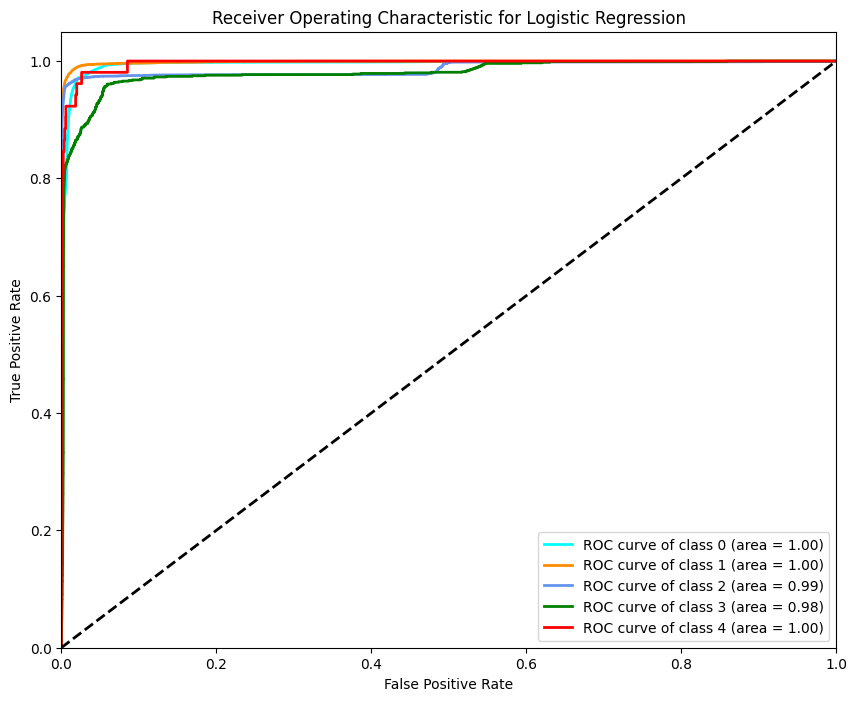

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# we binarize our target for ROC curve
y_train_bin = label_binarize(y_train, classes=[0, 1, 2, 3, 4])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])

# Fit the model and get probability estimates
y_train_prob = ovr_classifier.predict_proba(X_train_selected)
y_test_prob = ovr_classifier.predict_proba(X_test_selected)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y_train))):
    fpr[i], tpr[i], _ = roc_curve(y_train_bin[:, i], y_train_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])
for i, color in zip(range(len(np.unique(y_train))), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

In [ ]:
log_model = LogisticRegression()
ovr_classifier = OneVsRestClassifier(log_model)
ovr_classifier.fit(X_train_selected,y_train)
y_test_pred_log = ovr_classifier.predict(X_test_selected)

auc = roc_auc_score(y_test, y_test_pred_log,multi_class='ovr')
print(f"AUC: {auc:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

AxisError: ignored

**AdaBoost Classifier**

In [ ]:
ada = AdaBoostClassifier(n_estimators=90,learning_rate=1.0,algorithm='SAMME',random_state=None)

ada.fit(X_train_selected,y_train)

y_train_pred_ada = ada.predict(X_train_selected)
y_test_pred_ada = ada.predict(X_test_selected)

train_accuracy = accuracy_score(y_train, y_train_pred_ada)
test_accuracy = accuracy_score(y_test, y_test_pred_ada)

train_precision = precision_score(y_train, y_train_pred_ada,average='weighted')
test_precision = precision_score(y_test, y_test_pred_ada,average='weighted')

train_recall = recall_score(y_train, y_train_pred_ada,average='weighted')
test_recall = recall_score(y_test, y_test_pred_ada,average='weighted')

train_f1 = f1_score(y_train, y_train_pred_ada,average='weighted')
test_f1 = f1_score(y_test, y_test_pred_ada,average='weighted')

print('Training Accuracy: {:.2f}'.format(train_accuracy*100)+ '\tTest Accuracy:{:.2f}'.format(test_accuracy*100)+
      '\nTraining Precesion:{:.2f}'.format(train_precision*100)+'\tTest Precesion:{:.2f}'.format(test_precision*100)+
      '\nTraining Recall:{:.2f}'.format(train_recall*100)+'\t Test Recall:{:.2f}'.format(test_recall*100)+
      '\nTraining F1-Score:{:.2f}'.format(train_f1*100)+'\tTest F1-Score:{:.2f}'.format(test_f1*100))
print("----------------------------------------------------------------------")
print("Classification Report for AdaBoost on Test Data:\n")
print(classification_report(y_test, y_test_pred_ada, target_names=['Normal','Dos', 'Probe', 'R2L', 'U2R']))

Training Accuracy: 96.84	Test Accuracy:74.25
Training Precesion:96.41	Test Precesion:71.41
Training Recall:96.84	 Test Recall:74.25
Training F1-Score:96.52	Test F1-Score:69.21
----------------------------------------------------------------------
Classification Report for AdaBoost on Test Data:

              precision    recall  f1-score   support

      Normal       0.68      0.96      0.79      9711
         Dos       0.88      0.78      0.83      7460
       Probe       0.75      0.66      0.71      2421
         R2L       0.39      0.00      0.01      2885
         U2R       0.50      0.01      0.03        67

    accuracy                           0.74     22544
   macro avg       0.64      0.48      0.47     22544
weighted avg       0.71      0.74      0.69     22544



**AdaBoost - GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 70, 80, 90, 100],
    'learning_rate': [0.01, 0.1, 0.5, 1.0, 2.0],
    'algorithm': ['SAMME','SAMME.R']
}
ada = AdaBoostClassifier()

grid_search = GridSearchCV(ada, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_selected, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

y_pred_ada = grid_search.predict(X_test_selected)

print('Accuracy of AdaBoost classifier on training set: {:.4f}'
     .format(grid_search.score(X_train_selected, y_train)))
print('Accuracy of AdaBoost classifier on testing set: {:.4f}'
     .format(grid_search.score(X_test_selected, y_test)))

print("----------------------------------------------------------------------")
print("Classification Report for AdaBoost with GridSearch on Test Data:\n")
print(classification_report(y_test, y_pred_ada, target_names=['Normal','Dos', 'Probe', 'R2L', 'U2R']))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-46-fcb01a3d7d96>", line 10, in <cell line: 10>
    grid_search.fit(X_train_selected, y_train)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 874, in fit
    self._run_search(evaluate_candidates)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 1388, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 821, in evaluate_candidates
    out = parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 1863, in __call__


TypeError: ignored

**XGBoost Classifier**

In [ ]:
from xgboost import XGBClassifier
bst = XGBClassifier(num_class=5, max_depth=2, learning_rate=1, objective='multi:softmax')

bst.fit(X_train_selected,y_train)

y_train_pred_bst = bst.predict(X_train_selected)
y_test_pred_bst = bst.predict(X_test_selected)

train_accuracy = accuracy_score(y_train, y_train_pred_bst)
test_accuracy = accuracy_score(y_test, y_test_pred_bst)

train_precision = precision_score(y_train, y_train_pred_bst,average='weighted')
test_precision = precision_score(y_test, y_test_pred_bst,average='weighted')

train_recall = recall_score(y_train, y_train_pred_bst,average='weighted')
test_recall = recall_score(y_test, y_test_pred_bst,average='weighted')

train_f1 = f1_score(y_train, y_train_pred_bst,average='weighted')
test_f1 = f1_score(y_test, y_test_pred_bst,average='weighted')

print('Training Accuracy: {:.2f}'.format(train_accuracy*100)+ '\tTest Accuracy:{:.2f}'.format(test_accuracy*100)+
      '\nTraining Precesion:{:.2f}'.format(train_precision*100)+'\tTest Precesion:{:.2f}'.format(test_precision*100)+
      '\nTraining Recall:{:.2f}'.format(train_recall*100)+'\t Test Recall:{:.2f}'.format(test_recall*100)+
      '\nTraining F1-Score:{:.2f}'.format(train_f1*100)+'\tTest F1-Score:{:.2f}'.format(test_f1*100))
print("----------------------------------------------------------------------")
print("Classification Report for XGBoost on Test Data:\n")
print(classification_report(y_test, y_test_pred_bst, target_names=['Normal','Dos', 'Probe', 'R2L', 'U2R']))